<a href="https://colab.research.google.com/github/noersy/computer_vision/blob/main/neural_network/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#github repository sync in google colab
import os
try:
  # Colab only
  !git clone https://github.com/noersy/computer_vision.git
  os.chdir('/content')      
except Exception:
  pass

fatal: destination path 'computer_vision' already exists and is not an empty directory.


In [18]:
# Definisikan path untuk data daun_nangka dan data daun_sirih

base_dir = '/content/computer_vision/images'

daun_nangka_dir = os.path.join(base_dir, 'daun_nangka')
daun_sirih_dir = os.path.join(base_dir, 'daun_sirih')

In [19]:
import cv2
import numpy as np

# Gather data daun_nangka
daun_nangka_data = []
daun_nangka_label = []
for r, d, f in os.walk(daun_nangka_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            daun_nangka_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            daun_nangka_label.append(label)

daun_nangka_data = np.array(daun_nangka_data)
daun_nangka_label = np.array(daun_nangka_label)

In [20]:
# Gather data daun_sirih
daun_sirih_data = []
daun_sirih_label = []
for r, d, f in os.walk(daun_sirih_dir):
    for file in f:
        if ".png" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            daun_sirih_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            daun_sirih_label.append(label)

daun_sirih_data = np.array(daun_sirih_data)
daun_sirih_label = np.array(daun_sirih_label)

<h3>Data Preprocessing</h3>

In [21]:
# Tampilkan shape dari data train dan data validation
print("Daun Nangka Data = ", daun_nangka_data.shape)
print("Daun Nangka Label = ", daun_nangka_label.shape)
print("Daun Sirih Data = ", val_data.shape)
print("Daun Sirih Label = ", val_label.shape)

Daun Nangka Data =  (50, 150, 150, 3)
Daun Nangka Label =  (50,)
Daun Sirih Data =  (50, 150, 150, 3)
Daun Sirih Label =  (50,)


In [22]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", daun_nangka_data[0][0][0])

x_daun_nangka = daun_nangka_data.astype('float32') / 255.0
x_daun_sirih = daun_sirih_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_daun_nangka[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [23]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", daun_nangka_label[995:1005])

lb = LabelEncoder()
y_daun_nangka = lb.fit_transform(daun_nangka_label)
y_daun_sirih = lb.fit_transform(daun_sirih_label)

print("Label setelah di-encoder ", y_daun_nangka[995:1005])

Label sebelum di-encoder  []
Label setelah di-encoder  []


<h3>Definisikan Model</h3>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [25]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [26]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)      

In [28]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<h3>Training Model</h3>

In [30]:
H = model.fit(x_daun_nangka, y_daun_nangka, batch_size=20, epochs=15, validation_data=(x_daun_sirih, y_daun_sirih))

Epoch 1/15
3/3 [==============================] - 2s 549ms/step - loss: 0.2727 - acc: 0.8800 - val_loss: 3.0243e-09 - val_acc: 1.0000
Epoch 2/15
3/3 [==============================] - 1s 475ms/step - loss: 3.1218e-09 - acc: 1.0000 - val_loss: 7.9516e-15 - val_acc: 1.0000
Epoch 3/15
3/3 [==============================] - 1s 471ms/step - loss: 1.3206e-14 - acc: 1.0000 - val_loss: 2.7391e-19 - val_acc: 1.0000
Epoch 4/15
3/3 [==============================] - 1s 462ms/step - loss: 9.6840e-19 - acc: 1.0000 - val_loss: 7.1707e-23 - val_acc: 1.0000
Epoch 5/15
3/3 [==============================] - 1s 465ms/step - loss: 5.4597e-22 - acc: 1.0000 - val_loss: 1.0548e-25 - val_acc: 1.0000
Epoch 6/15
3/3 [==============================] - 1s 462ms/step - loss: 1.0551e-24 - acc: 1.0000 - val_loss: 5.8797e-28 - val_acc: 1.0000
Epoch 7/15
3/3 [==============================] - 1s 460ms/step - loss: 1.1913e-26 - acc: 1.0000 - val_loss: 1.0164e-29 - val_acc: 1.0000
Epoch 8/15
3/3 [======================

<h3>Evaluasi Model</h3>

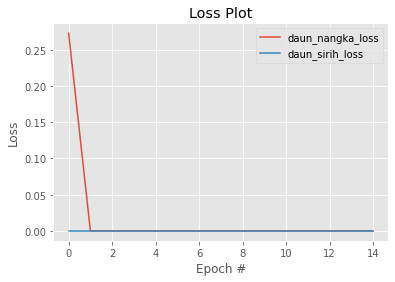

In [33]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="daun_nangka_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="daun_sirih_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

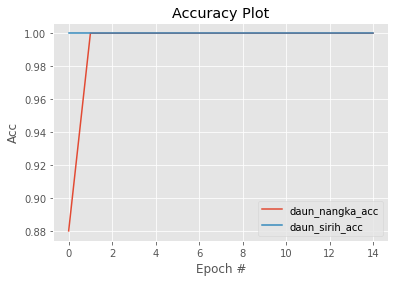

In [34]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="daun_nangka_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="daun_sirih_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import classification_report

pred = model.predict(x_daun_sirih)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_daun_sirih, labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

